# PATIENT INFORMATION & HEALTH INSURANCE COST
## **HANDLING MISSING DATA & OUTLIERS (2)** 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_csv("insurance.csv")
data = original_data.copy()
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
data.dtypes.to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,int64,object,float64,int64,object,object,float64


## **1-) Missing Value Imputation**

In [4]:
# Number of missing observations in the dataset

data.isnull().sum().to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


## **2-) Handling Outliers**

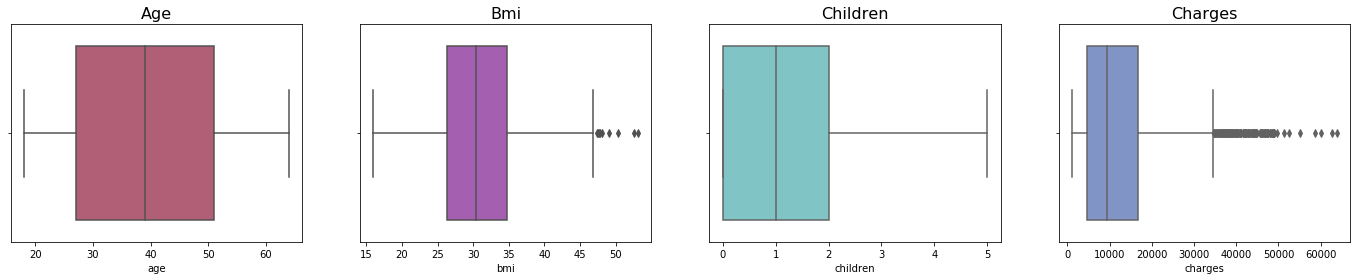

In [5]:
numeric_features = []
for num in np.arange(0, len(data.columns)):
    if data.dtypes[num] != "object":
        numeric_features.append(data.columns[num])

colors = ["#BD5272", "#AF52BD", "#74CFD2", "#7490D2"]

fig = plt.figure(figsize = (24,4))
plot_positions = np.arange(141, 145)

for feature, color, position in zip(numeric_features, colors, plot_positions):
    ax = fig.add_subplot(position)
    ax.set_title(feature.capitalize(), fontsize = 16)
    sns.boxplot(x = data[feature], color = color)

**As can be seen in the boxplots above, our dataset has outliers in "charges" and "bmi" features.**

## **BMI**

In [6]:
bmi = data["bmi"]
bmi.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13


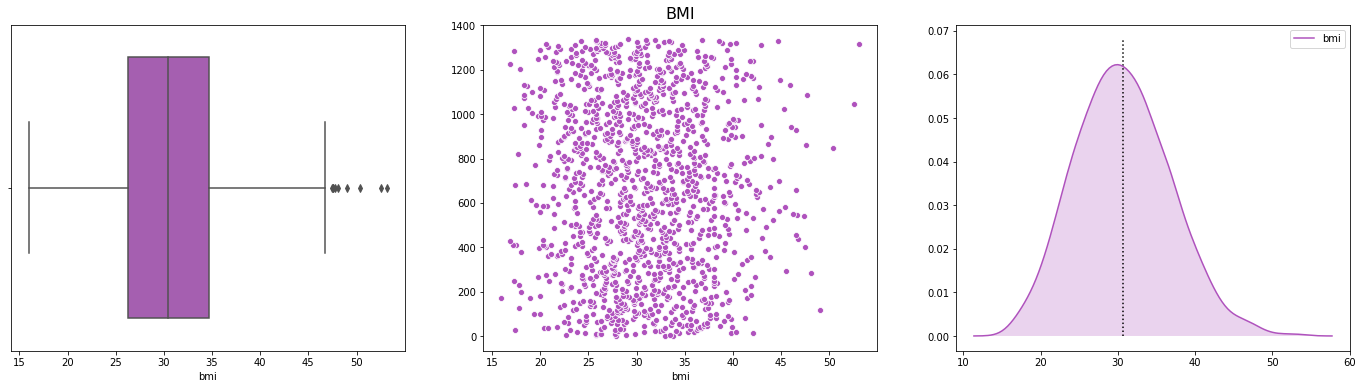

In [7]:
fig = plt.figure(figsize = (24,6))

ax = fig.add_subplot(131)
sns.boxplot(x = data["bmi"], color = "#AF52BD")

ax = fig.add_subplot(132)
sns.scatterplot(x = data["bmi"], y = data["bmi"].index, color = "#AF52BD")
ax.set_title("BMI", fontsize = 16)

ax = fig.add_subplot(133)
sns.kdeplot(data["bmi"], shade = True, color = "#AF52BD")
plt.vlines(x = data["bmi"].mean(), linestyles = "dotted", ymin = 0, ymax = 0.068);

## **Standard Deviation Method**

In [8]:
bmi_mean = bmi.mean()
bmi_std = bmi.std()
bmi_cut_off = bmi_std * 3

bmi_lower_std = bmi_mean - bmi_cut_off 
bmi_upper_std = bmi_mean + bmi_cut_off 

print(f"Lower bound: {bmi_lower_std}")
print(f"Upper bound: {bmi_upper_std}")

Lower bound: 12.368836125949485
Upper bound: 48.95795759602359


In [9]:
data[data["bmi"] < bmi_lower_std]

,age,sex,bmi,children,smoker,region,charges


In [10]:
data[data["bmi"] > bmi_upper_std]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


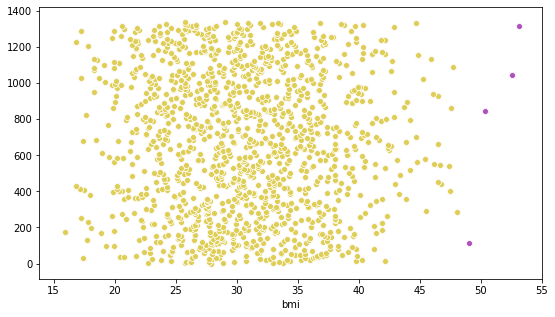

In [11]:
cleaned_bmi_std = bmi[~((bmi < bmi_lower_std) | (bmi > bmi_upper_std))]

fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["bmi"], y = data["bmi"].index, color = "#AF52BD")
sns.scatterplot(x = cleaned_bmi_std, y = cleaned_bmi_std.index, color = "#DFCE56");

# Purple spots identified as outliers by the standard deviation method.

## **Interquartile Range Method**

In [12]:
bmi_Q1 = bmi.quantile(0.25)
bmi_Q3 = bmi.quantile(0.75)
bmi_IQR = bmi_Q3 - bmi_Q1

bmi_lower_iqr = bmi_Q1 - (1.5 * bmi_IQR)
bmi_upper_iqr = round((bmi_Q3 + (1.5 * bmi_IQR)), 1)

print(f"Lower bound: {bmi_lower_iqr}")
print(f"Upper bound: {bmi_upper_iqr}")

Lower bound: 13.7
Upper bound: 47.3


In [13]:
data[data["bmi"] < bmi_lower_iqr]

,age,sex,bmi,children,smoker,region,charges


In [14]:
data[data["bmi"] > bmi_upper_iqr]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


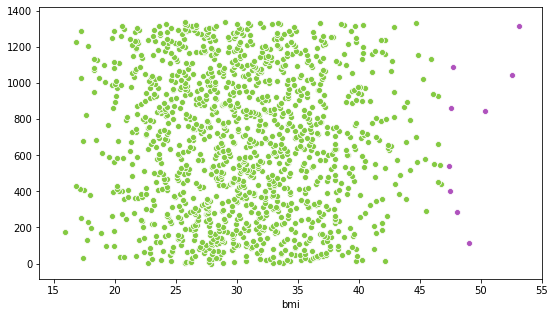

In [15]:
cleaned_bmi_iqr = bmi[~((bmi < bmi_lower_iqr) | (bmi > bmi_upper_iqr))]

fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["bmi"], y = data["bmi"].index, color = "#AF52BD")
sns.scatterplot(x = cleaned_bmi_iqr, y = cleaned_bmi_iqr.index, color = "#84CA42");

# Purple spots identified as outliers by the interquartile range method.

## **Z-Score**

In [16]:
from scipy import stats

z_scores = np.abs(stats.zscore(data["bmi"]))
threshold = 2.8

cleaned_bmi_z = bmi[z_scores < threshold]
cleaned_bmi_z.head(10).to_frame().T

,0,1,2,3,4,5,6,7,8,9
bmi,27.9,33.77,33.0,22.705,28.88,25.74,33.44,27.74,29.83,25.84


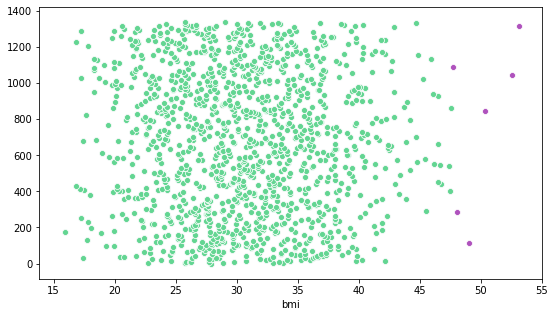

In [17]:
fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["bmi"], y = data["bmi"].index, color = "#AF52BD")
sns.scatterplot(x = cleaned_bmi_z, y = cleaned_bmi_z.index, color = "#63D592");

# Purple spots identified as outliers by the z-score method.

## **Charges**

In [18]:
charges = data["charges"]
charges.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


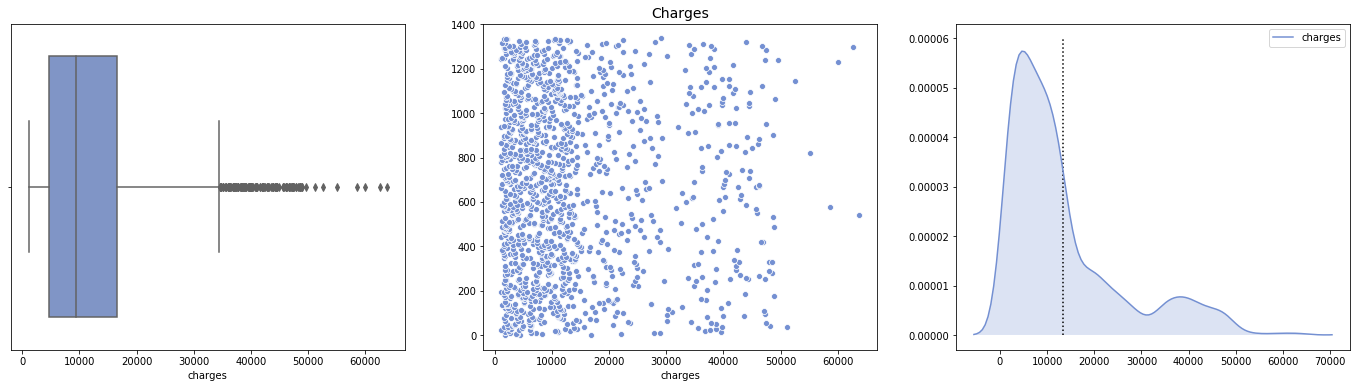

In [19]:
fig = plt.figure(figsize = (24,6))

ax = fig.add_subplot(131)
sns.boxplot(x = data["charges"], color = "#7490D2")

ax = fig.add_subplot(132)
sns.scatterplot(x = data["charges"], y = data["charges"].index, color = "#7490D2")
ax.set_title("Charges", fontsize = 14)

ax = fig.add_subplot(133)
sns.kdeplot(data["charges"], shade = True, color = "#7490D2")
plt.vlines(x = data["charges"].mean(), linestyles = "dotted", ymin = 0, ymax = 6 * 10**-5);

## **Standard Deviation Method**

In [20]:
charges_mean = charges.mean()
charges_std = charges.std()
charges_cut_off = charges_std * 3

charges_lower_std = charges_mean - charges_cut_off 
charges_upper_std = charges_mean + charges_cut_off 

print(f"Lower bound: {charges_lower_std}")
print(f"Upper bound: {charges_upper_std}")

Lower bound: -23059.611444940725
Upper bound: 49600.45597522324


In [21]:
data[data["charges"] < charges_lower_std]

,age,sex,bmi,children,smoker,region,charges


In [22]:
data[data["charges"] > charges_upper_std]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


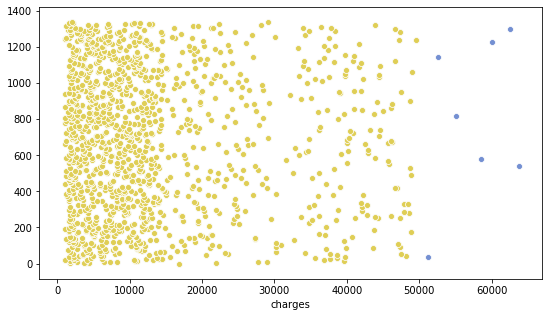

In [23]:
cleaned_charges_std = charges[~((charges < charges_lower_std) | (charges > charges_upper_std))]

fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["charges"], y = data["charges"].index, color = "#7490D2")
sns.scatterplot(x = cleaned_charges_std, y = cleaned_charges_std.index, color = "#DFCE56");

# Light navy spots identified as outliers by the standard deviation method.

## **Interquartile Range Method**

In [24]:
charges_Q1 = charges.quantile(0.25)
charges_Q3 = charges.quantile(0.75)
charges_IQR = charges_Q3 -charges_Q1

charges_lower_iqr = round((charges_Q1 - (1.5 * charges_IQR)),2)
charges_upper_iqr = round((charges_Q3 + (1.5 * charges_IQR)),2)

print(f"Lower bound: {charges_lower_iqr}")
print(f"Upper bound: {charges_upper_iqr}")

Lower bound: -13109.15
Upper bound: 34489.35


In [25]:
data[data["charges"] < charges_lower_iqr]

,age,sex,bmi,children,smoker,region,charges


In [26]:
data[data["charges"] > charges_upper_iqr]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


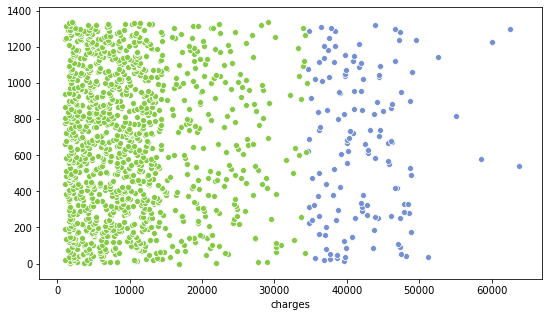

In [27]:
cleaned_charges_iqr = charges[~((charges < charges_lower_iqr) | (charges > charges_upper_iqr))]

fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["charges"], y = data["charges"].index, color = "#7490D2")
sns.scatterplot(x = cleaned_charges_iqr, y = cleaned_charges_iqr.index, color = "#84CA42");

# Light navy spots identified as outliers by the interquartile range method.

## **Z-Score**

In [28]:
from scipy import stats

z_scores_charges = np.abs(stats.zscore(data["charges"]))
threshold = 3

cleaned_charges_z = charges[z_scores_charges < threshold]
cleaned_charges_z.head(10).to_frame().T

,0,1,2,3,4,5,6,7,8,9
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,6406.4107,28923.13692


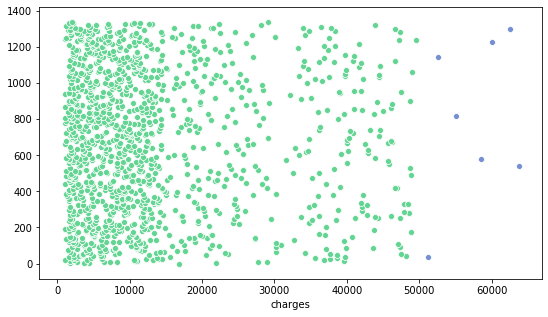

In [29]:
fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(x = data["charges"], y = data["charges"].index, color = "#7490D2")
sns.scatterplot(x = cleaned_charges_z, y = cleaned_charges_z.index, color = "#63D592");

# Light navy spots identified as outliers by the z-score method.

_**Based on the outliers we obtained with three different methods, I decided that the interquartile range method for "bmi" columnd and the "standard deviation method" for the "charges" column were the most appropriate methods.**_

In [30]:
bmi_outlier_index = (data["bmi"] < bmi_lower_iqr) | (data["bmi"] > bmi_upper_iqr)
charges_outlier_index = (data["charges"] < charges_lower_std) | (data["charges"] > charges_upper_std)
outlier_index = data[bmi_outlier_index | charges_outlier_index].index

In [31]:
data.drop(index = outlier_index, inplace = True)

In [32]:
data.to_csv("cleaned_data.csv")

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
